In [2]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [3]:
#read in cleaned data

df = pd.read_csv('../Data/cleaned.csv')

df.head()

,title,subreddit
0,women of reddit when you are in a relationship...,1
1,do you have a hot take what is it,1
2,why do you cry so much over little things,1
3,as an adult how do you make more female friends,1
4,which 3rd party reddit app do you use and what...,1


In [7]:
def production_function(df):
    
    #show baseline score

    print('baseline score is:')
    print(df['subreddit'].value_counts(normalize=True))
    print('~~~~~~~~~~~~~~~~~')
    
    #set variables for modeling

    X = df['title']

    y = df['subreddit']

    #train test split for model evaluation

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
    
    #instantiate cvec with best params from testing

    cvec = CountVectorizer(max_features = 10_000, ngram_range = (1, 2))
    
    #apply cvec to training and testing

    X_train = cvec.fit_transform(X_train)

    X_test = cvec.transform(X_test)

    #instantiate naive bayes
    
    nb = BernoulliNB()
    
    #fit model on training

    nb.fit(X_train, y_train)
    
    #print training and test scores

    print(f'training score:  {nb.score(X_train, y_train)}')

    print(f'testing score: {nb.score(X_test, y_test)}')
    
    print('~~~~~~~~~~~~~~~~~')
    
    #make predictions

    preds = nb.predict(X_test)

    #generate confusion matrix
    
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()

    print('Confusion matrix:')
    
    ConfusionMatrixDisplay(cm).plot();

    return

baseline score is:
0    0.5
1    0.5
Name: subreddit, dtype: float64
~~~~~~~~~~~~~~~~~
training score:  0.751362962962963
testing score: 0.7204444444444444
~~~~~~~~~~~~~~~~~
Confusion matrix:


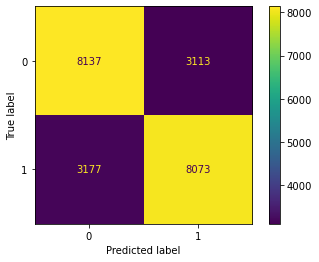

In [9]:
production_function(df)

In [ ]:
# The training and testing accuracy scores are the most similar for training and testing data. 
# This model performs the most similar on seen and unseen data which is why it was selected as the production model.
# I used the best features from the gridsearch in the other notebook in the count vec instance. 
# A confusion matrix to show the true values vs predictions is below. 